##Getting started

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform, img_as_float

Since images are basically 2D arrays, lets start by learning about different ways to create Python arrays.

Image generated using GPT -

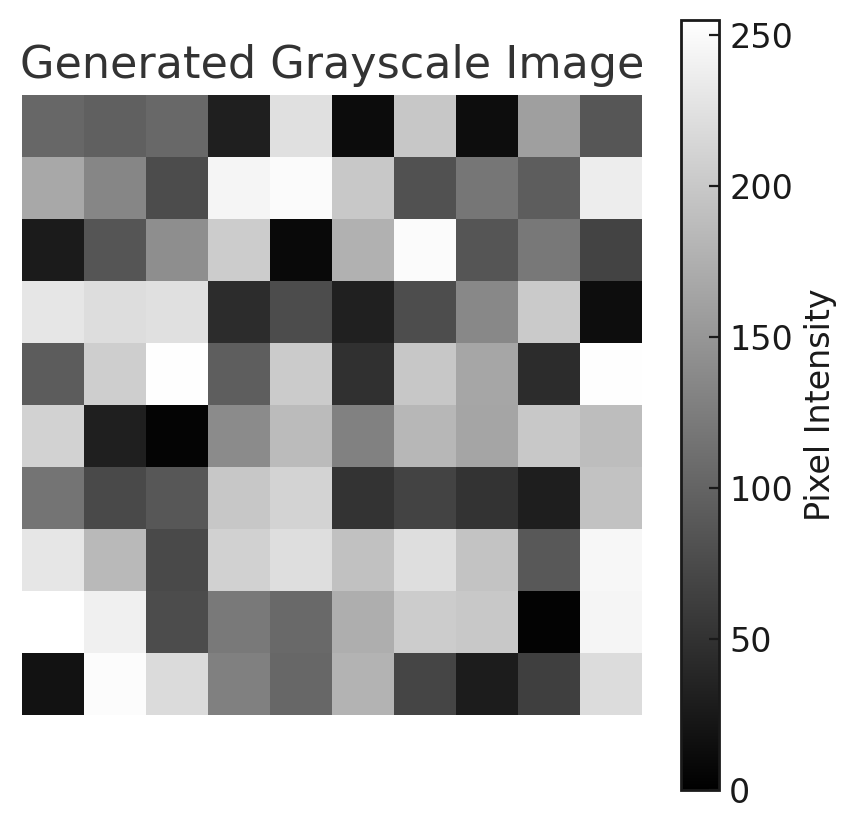



## Defining arrays using Python Lists

At first we try out the built in list type object of Python -

In [159]:
x = [1, 2, 4, 5, 7]
print(x)

#Here x is a 1D array implemented as a Python list

[1, 2, 4, 5, 7]


In image processing we have to manipulate the image array. Lets consider the simplest form of manipulation - adding a constant value to the array.


We try the format  -->  list + int, and see what happens


In [160]:
# x = x + 4
# print(x)

As you can see that it has returned an error. So we have to iterate through all the data points and add the constant to them -

In [161]:
for i in range(len(x)):
  x[i] = x[i] + 4
print(x)

[5, 6, 8, 9, 11]


This time it worked.

## Defining arrays using NumPy ndarray

But in practice, we do not use Python lists as they need a lot of memory allocation due to their "flexibility".

Instead we will work with NumPy arrays that are more memory efficient and can be processed more efficiently in the future pipelines that we will work on.

In [162]:
#This is how we define numpy arrays
x = np.array([1, 2, 4, 5, 7])
print(x)

[1 2 4 5 7]


Remember the problem we faced while working with lists? We couldn't add list object and int object together. This happens because the objects in the lists are never bounded to a specific object type as a list is designed to contain multiple heterogenous object types at the same time.

However, NumPy forces all the objects in an array to belong to the same data type. Since, by default our NumPy array 'x' contains integers, we can add integers directly to the array.

In [163]:
x = x + 4
print(x)

[ 5  6  8  9 11]


The same code works now without returning error.

So far we have worked with 1D arrays. However, mainstream images are 2D at the very least (grayscale) and 3D in most cases (RGB). So, let us define a 2D array now -

In [164]:
# declare an array of 2 rows, 3 columns
x = np.array([[2,3,4],[5,6,14]])

In [165]:
print(x)

[[ 2  3  4]
 [ 5  6 14]]


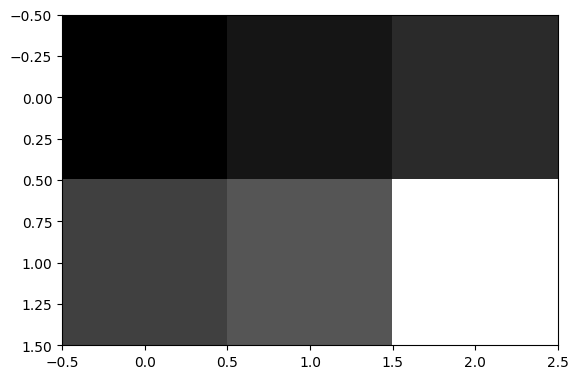

In [166]:
plt.imshow(x, cmap='grey')

The `cmap = 'gray'` ensures that the plot is done in grayscale.

Without cmap, the function plots the image in `viridis` color palette.

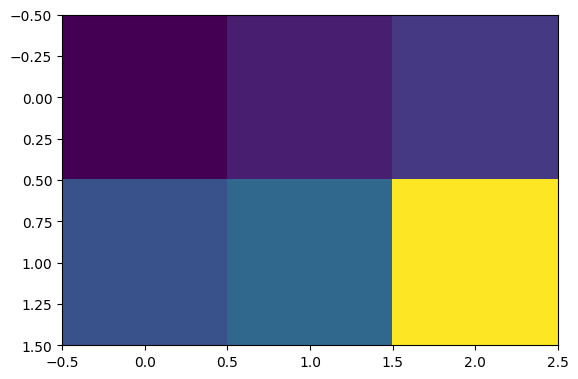

In [167]:
plt.imshow(x)

## Array slicing

In later classes you will learn more about the importance of neigborhood processing. Neighborhood processing requires you to select a specific region from the image. We can do so by array slicing. In simpler terms array slicing refers to selecting specific data points from an array.

In [168]:
# declare an array of 2 rows, 3 columns
x = np.array([[2,3,4],[5,6,14]])

x[1,:]

array([ 5,  6, 14])

Here we have selected the (1+1)th row and all the columns.

A more extreme case of slicing is picking only one entry from the whole array (indexing) -

In [169]:
x = np.array([1, 2, 4, 5, 7, 12, -55, 77, 10])

In [170]:
print(x[3])

5


In [171]:
print(x[-5])

7


To find a specific entry in a multidimensional array, you have to define all the index values.

For example, for the 2D array -

\begin{bmatrix}
2 \ 3 \ 4 \\
5 \ 6 \ 7 \\
\end{bmatrix}

if we want to select the value 4, we have to access the 1st row (index = 1 -1 = 0) and 3rd column (index = 3 -1 = 2)

We can achieve this by -

In [172]:
x = np.array([[2,3,4],[5,6,7]])
print(x)

[[2 3 4]
 [5 6 7]]


To access each element, we have to provide both dimensional indices.

In [173]:
print(x[0][-1])
print(x[0,-1])

4
4


Similarly, we can define a 3D array too -

In [174]:
x = np.array([[[2,3,4],[5,6,7]],[[2,3,4],[5,6,7]]])
print(x)

[[[2 3 4]
  [5 6 7]]

 [[2 3 4]
  [5 6 7]]]


During slicing, the start is inclusive and the end is exclusive.

`x[start:end] = [x[start], x[start+1], ....., x[end-1]]`

In [175]:
x = np.array([1, 2, 4, 5, 7, 8, 9, 12])
print(x[1:-1])

[2 4 5 7 8 9]


You can further fine tune the slicing by including a step size -

`x[start:end:step] = x[start], x[start+step], x[start+2*step],.... x[end-1]`

In [176]:
x[1:-1:3]

array([2, 7])

In case you do not mention the step size, a default size of 1 is used.

In [177]:
print(x[0:5])

[1 2 4 5 7]


In [178]:
print(x[1:4:2])

[2 5]


If the start index is left blank, we start from the very start of the original array. Same with the end value. If the end index is left blank, we continue slicing till the very end of the original array.

In summary -

`x[start:end]`

`x[start:end:step]`

`x[::]`

start is not specified, 0

end is not specified, len(x)

step is not specified, 1

In [179]:
print(x[::1])

[ 1  2  4  5  7  8  9 12]


A negative step value can be used to traverse the original array in a reverse order.

In [180]:
print(x[::-1])

[12  9  8  7  5  4  2  1]


In [181]:
print(x[::-2])

[12  8  5  2]


In [182]:
x = np.array([[2,3,4],[5,6,7]])
print(x)

[[2 3 4]
 [5 6 7]]


If your indices are out of bounds of your available data, what happens? Run the next cell to find out -

In [183]:
x[20:35][100:120]

array([], shape=(0, 3), dtype=int64)

In [184]:
print(x[:,::2])

[[2 4]
 [5 7]]


## Boolean indexing

Sometimes, you might want to select certain pixels (data points) whose values are above a certain threshold and perform some operations on them.

For example in grayscale to binary image conversion, we select the pixels with gray values above a certain threshold, and assign a pixel value of 1 to them while keeping all the rest of the pixels equal to 0.

Now the question is, how can we select these pixels that meet our thresholding criteria? We can do this by Boolean indexing. Check out the code given below -

In [185]:
# boolean indexing

x = np.array([2, 1, -5, -4, 4, 5])

In [186]:
# to select the values of x greater than 0

print(x[x>0])

[2 1 4 5]


By building on our current intuition x>0 must give us the indices. So lets check what x>0 returns -

In [187]:
print(x>0)

[ True  True False False  True  True]


These are the Boolean indices. When passed through as indices to an array this will return the values only when the indices are True.

Some extra examples -

In [188]:
x*(x>0)

array([2, 1, 0, 0, 4, 5])

In [189]:
index = [False, False, True, True, False, False]

Since `x = [2, 1, -5, -4, 4, 5]`, indexing using our index variable should give us `[-5, -4]`. Lets run the next cell to find out -

In [190]:
x[index]

array([-5, -4])

Now lets find the x values that are greater than 0. Lets first do it one step at a time -

In [191]:
index = x > 0

In [192]:
index

array([ True,  True, False, False,  True,  True])

In [193]:
x[index]

array([2, 1, 4, 5])

We can also do the same thing using only one line -

In [194]:
x[ x > 0 ]

array([2, 1, 4, 5])

Thresholding operation is done to convert grayscale to binary image. Lets see a small demo with a small 2D array -

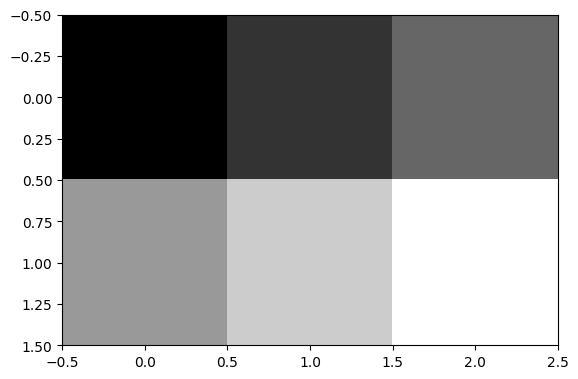

In [195]:
x = np.array([[2,3,4],[5,6,7]])
plt.imshow(x, cmap = 'gray')

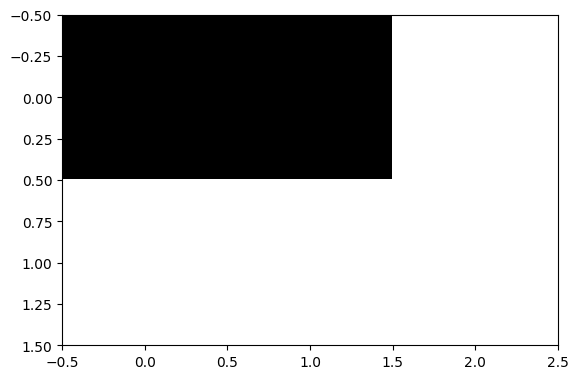

In [196]:
threshold_value = 3
x_thresholded = (x > threshold_value).astype(int)

plt.imshow(x_thresholded, cmap = 'gray')

So, what is going on over here is that, `x > threshold_value` is returning a Boolean index array -

$$x > 3 = \begin{bmatrix}
2 \ 3 \ 4 \\
5 \ 6 \ 7 \\
\end{bmatrix} > 3 =
\begin{bmatrix}
False \ False \ True \\
True \ True \ True \\
\end{bmatrix}
$$

But imshow expects numbers and not True and False values. So, we used typecasting to `int`. `int(True) = 1` and `int(False) = 0`. So we end up getting -

$$int(x>3) =
\begin{bmatrix} 0 \ 0 \ 1 \\
1 \ 1 \ 1 \\ \end{bmatrix}$$

# Image as NumPy array

We have already seen NumPy arrays used as grayscale images -

In [197]:
x = np.random.rand(4, 5)
print(x)
print("shape -", x.shape)

[[0.92218439 0.54383169 0.28682444 0.75407376 0.98797383]
 [0.36993495 0.70503754 0.35539303 0.71088444 0.82850824]
 [0.93548451 0.4996015  0.13316625 0.33508656 0.49381039]
 [0.24505991 0.2256077  0.37490318 0.7097976  0.51290615]]
shape - (4, 5)


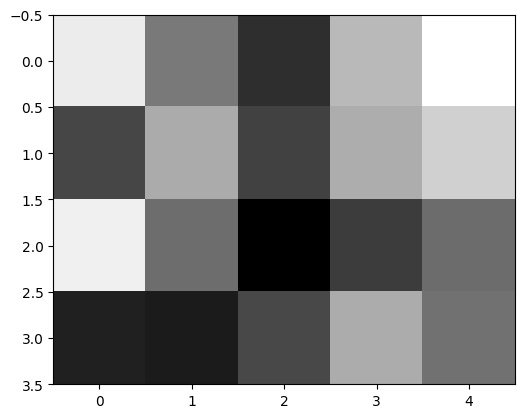

In [198]:
plt.imshow(x, cmap='gray',)
# plt.axis("off")

Now the dimension of this image along the row is called the image height and teh dimension along the column is called the width.

In [199]:
#height, width = x.shape[:2]
height = x.shape[0]
width = x.shape[1]
print("Height =", height)
print("Width =", width)

Height = 4
Width = 5


But the image we have just seen is a grayscale image. Grayscale images have only one channel. But for RGB images, there will be 3 channels. The channel dimension is generally placed at the very end, `[height, width, channels]`.

In [200]:
x = np.random.rand(4, 5, 3)
height, width, nchannels = x.shape
print("Height =", height)
print("Width =", width)
print("Number of channels =", nchannels)

Height = 4
Width = 5
Number of channels = 3


In [201]:
print(x)

[[[6.83487148e-01 3.69139929e-01 5.79563083e-01]
  [8.78982902e-02 4.32425654e-01 6.73146324e-01]
  [7.85332137e-01 8.44156326e-01 1.98859542e-01]
  [2.92195446e-01 9.12533053e-01 5.64380620e-02]
  [9.04243635e-01 1.66659619e-02 5.23673075e-04]]

 [[5.41480480e-01 9.11481980e-01 9.90550879e-01]
  [5.15860815e-02 9.22786120e-01 6.69548022e-01]
  [8.43840521e-01 9.12953044e-01 6.07591808e-01]
  [8.80559445e-02 5.12577951e-01 8.94566031e-01]
  [5.74530662e-01 1.91241216e-01 3.38992797e-01]]

 [[4.50627255e-01 2.78488155e-01 6.83604038e-01]
  [3.73028159e-02 9.94138150e-01 2.78465260e-01]
  [6.20490519e-01 1.51966400e-01 9.39270587e-01]
  [4.74684509e-01 6.92044970e-01 2.45714289e-01]
  [1.37895652e-01 5.41602947e-01 4.45205721e-01]]

 [[1.26171498e-01 2.82581039e-01 4.59719573e-01]
  [7.54651351e-01 1.47956395e-01 8.05188086e-01]
  [5.71591547e-02 9.71523894e-01 1.23526603e-01]
  [9.99495630e-01 1.75314678e-01 2.82480307e-02]
  [1.08246857e-01 5.74856081e-01 9.69833786e-01]]]


In [202]:
print("Red Channel")
print(x[:, :, 0])

print("Green Channel")
print(x[:, :, 1])

print("Blue Channel")
print(x[:, :, 2])

Red Channel
[[0.68348715 0.08789829 0.78533214 0.29219545 0.90424363]
 [0.54148048 0.05158608 0.84384052 0.08805594 0.57453066]
 [0.45062725 0.03730282 0.62049052 0.47468451 0.13789565]
 [0.1261715  0.75465135 0.05715915 0.99949563 0.10824686]]
Green Channel
[[0.36913993 0.43242565 0.84415633 0.91253305 0.01666596]
 [0.91148198 0.92278612 0.91295304 0.51257795 0.19124122]
 [0.27848815 0.99413815 0.1519664  0.69204497 0.54160295]
 [0.28258104 0.1479564  0.97152389 0.17531468 0.57485608]]
Blue Channel
[[5.79563083e-01 6.73146324e-01 1.98859542e-01 5.64380620e-02
  5.23673075e-04]
 [9.90550879e-01 6.69548022e-01 6.07591808e-01 8.94566031e-01
  3.38992797e-01]
 [6.83604038e-01 2.78465260e-01 9.39270587e-01 2.45714289e-01
  4.45205721e-01]
 [4.59719573e-01 8.05188086e-01 1.23526603e-01 2.82480307e-02
  9.69833786e-01]]


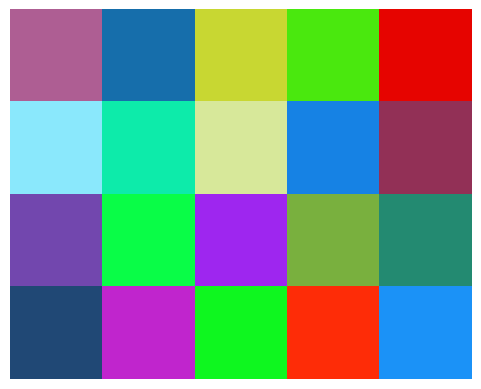

In [203]:
plt.imshow(x)
plt.axis("off");

For RGB or 3 channel images, `imshow` doesn't need the `cmap` argument. It automatically plots in RGB.

If you want to slice an RGB image, remember to keep the channel dimension intact -

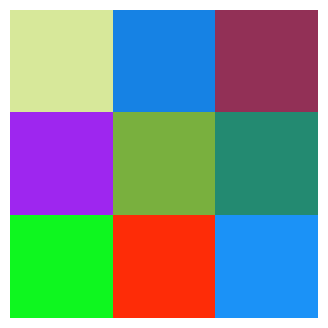

In [204]:
plt.figure(figsize=(4, 4))
x_cropped = x[-3:,-3:,:]
plt.imshow(x_cropped)
plt.axis("off");

Finally, the sequence of these dimensions will not matter much when we go to the latter labs. We will work with PyTorch and PyTorch will require the data in this format - `channels, height, width`. So there is no need to learn it so rigidly.

# Real Digital Image

## Example 1

In [205]:
I = io.imread("/content/sample_1.jpg")
height, width, channel = I.shape
print("Height =", height)
print("Width =", width)
print("No of channels=", channel)

Height = 1200
Width = 940
No of channels= 3


In [206]:
print(I)

[[[49 53 54]
  [51 55 56]
  [54 58 59]
  ...
  [68 68 66]
  [62 62 60]
  [61 61 59]]

 [[45 49 50]
  [47 51 52]
  [48 52 53]
  ...
  [68 68 66]
  [67 67 65]
  [69 69 67]]

 [[43 47 48]
  [44 48 49]
  [45 49 50]
  ...
  [68 68 66]
  [69 69 67]
  [70 70 68]]

 ...

 [[12 14 13]
  [ 8 10  9]
  [ 4  6  5]
  ...
  [ 8  9 11]
  [ 9 10 12]
  [ 9 10 12]]

 [[14 15 17]
  [ 8  9 11]
  [ 1  2  4]
  ...
  [12 13 17]
  [10 11 15]
  [10 11 15]]

 [[14 15 17]
  [ 6  7  9]
  [ 0  0  4]
  ...
  [11 12 17]
  [ 8  9 14]
  [ 7  8 13]]]


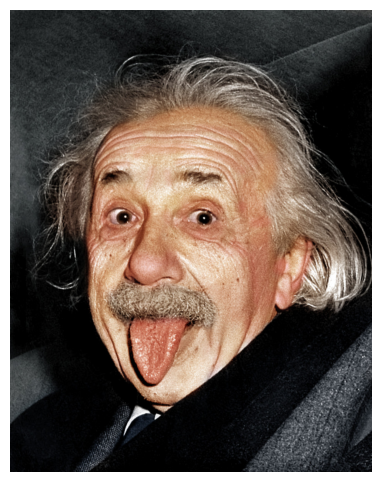

In [207]:
plt.figure(figsize=(6, 6))
plt.imshow(I)
plt.axis("off");

In [208]:
# print(I)

In [209]:
x = I[0, 0]
y = I[-1, 0]
print(x)
print(y)

[49 53 54]
[14 15 17]


`skimage.io.imread` generally reads the data in 8 bit format (either raw or interpolated). We can check this by checking the dtype of the pixels.

In [210]:
print(x.dtype)

uint8


`skimage` can also load data in 16 and 32 bit format if required.

In [211]:
print("Red\n",I[:, :, 0])

print("Green\n",I[:, :, 1])

print("Blue\n",I[:, :, 2])

Red
 [[49 51 54 ... 68 62 61]
 [45 47 48 ... 68 67 69]
 [43 44 45 ... 68 69 70]
 ...
 [12  8  4 ...  8  9  9]
 [14  8  1 ... 12 10 10]
 [14  6  0 ... 11  8  7]]
Green
 [[53 55 58 ... 68 62 61]
 [49 51 52 ... 68 67 69]
 [47 48 49 ... 68 69 70]
 ...
 [14 10  6 ...  9 10 10]
 [15  9  2 ... 13 11 11]
 [15  7  0 ... 12  9  8]]
Blue
 [[54 56 59 ... 66 60 59]
 [50 52 53 ... 66 65 67]
 [48 49 50 ... 66 67 68]
 ...
 [13  9  5 ... 11 12 12]
 [17 11  4 ... 17 15 15]
 [17  9  4 ... 17 14 13]]


## Problem with **uint8**

uint8 makes the pixel value range between $[0,255]$. However, as we will go further into the labs, we will see that normalization is a big deal. Min-max normalization requires all data to be within the range $[0,1]$, and keeping the input data big causes problem while training our neural network.

As such, we want our pixel values to be in the range of $[0,1]$ instead of $[0, 255]$. So, we can just do this -

$$I_{normalized} = \frac{I}{255}$$

This works as long as the input data is 8 bit coded. But what if the data wasn't 8 bit coded? This is why instead of doing it manually, we let the library function `img_as_float` to do the normalization for us. The function takes the input bitrate into account.

In [212]:
# Bad way of normalization
# I = I/255

# Good way
I = img_as_float(I)


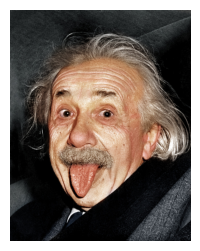

In [213]:
plt.figure(figsize=(3, 3))
plt.imshow(I)
plt.axis("off");

Normalizing doesn't change the image.

## Example 2

In [214]:
I = io.imread("sample_2.jpg")

In [215]:
I.shape

(360, 506, 3)

In [216]:
height, width, nchannels = I.shape
print("Height =", height)
print("Width =", width)
print("Number of channels =", nchannels)

Height = 360
Width = 506
Number of channels = 3


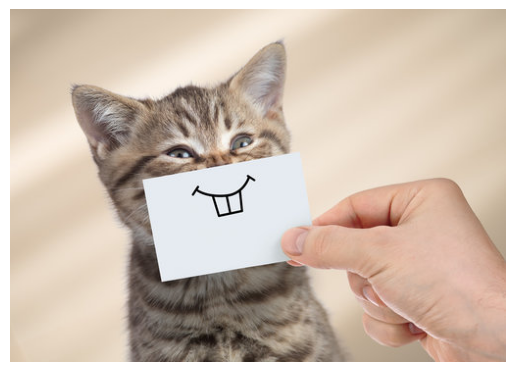

In [217]:
plt.imshow(I)
plt.axis('off');

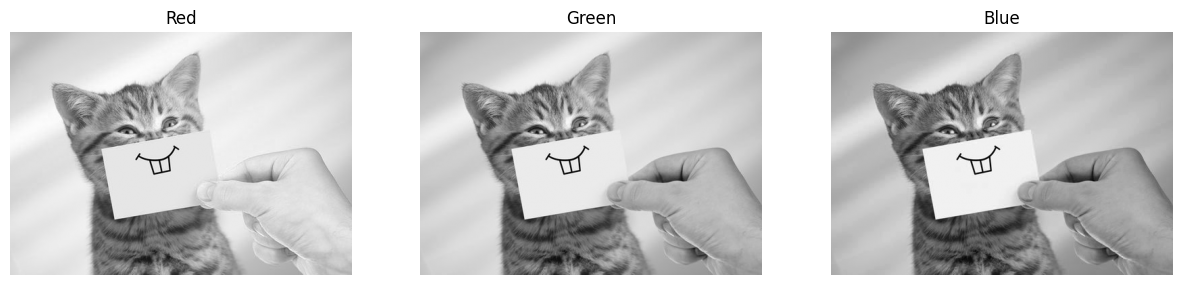

In [218]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Red channel
axes[0].imshow(I[:, :, 0], cmap="gray")
axes[0].axis("off")
axes[0].set_title("Red")

# Green channel
axes[1].imshow(I[:, :, 1], cmap="gray")
axes[1].axis("off")
axes[1].set_title("Green")

# Blue channel
axes[2].imshow(I[:, :, 2], cmap="gray")
axes[2].axis("off")
axes[2].set_title("Blue");

Now please remember that the channels themselves do not represent color. When observed together under the RGB color map, we see an RGB image.

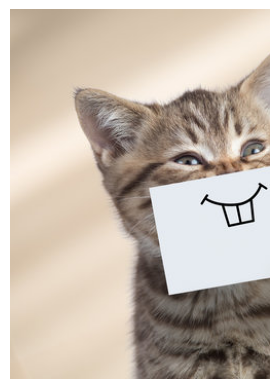

In [219]:
# Only the left half of the image
I_cropped = I[:, :width//2, :]
plt.imshow(I_cropped)
plt.axis("off");

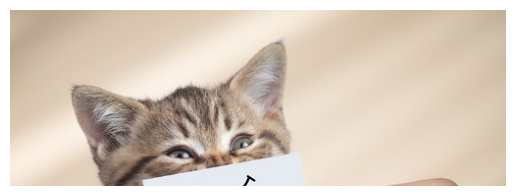

In [220]:
# Only the  bottom half of the image
I_cropped = I[:height//2, :, :]
plt.imshow(I_cropped)
plt.axis("off");

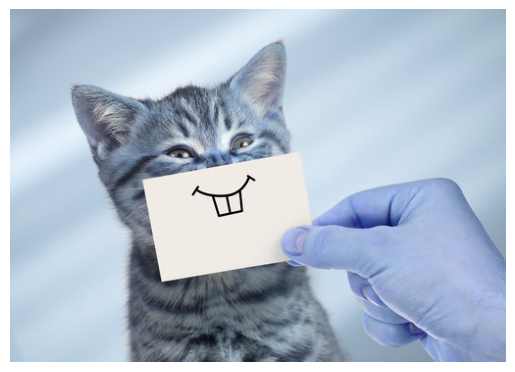

In [221]:
# flip along width (with respect to y axis)
# I_flipped = I[:, ::-1, :]
I_flipped = I[:, :, ::-1]
plt.imshow(I_flipped)
plt.axis("off");

So what happened here? We flipped the 3rd dimension or the channel dimension. So the colors got all messed up.

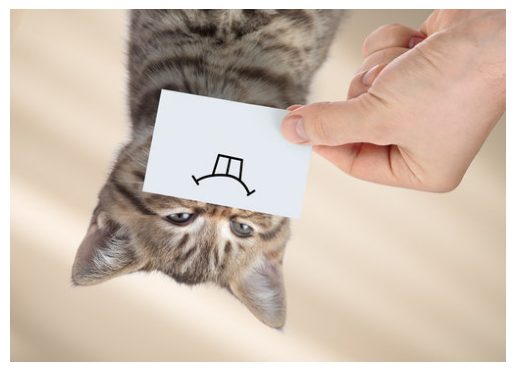

In [222]:
# flip along height (with respect to x axis)
I_flipped = I[::-1, :, :]
plt.imshow(I_flipped)
plt.axis("off");

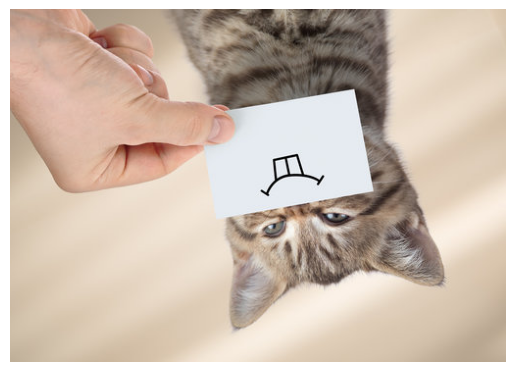

In [223]:
# Rotate 180 degree
I_rotated = I[::-1, ::-1, :]
plt.imshow(I_rotated)
plt.axis("off");

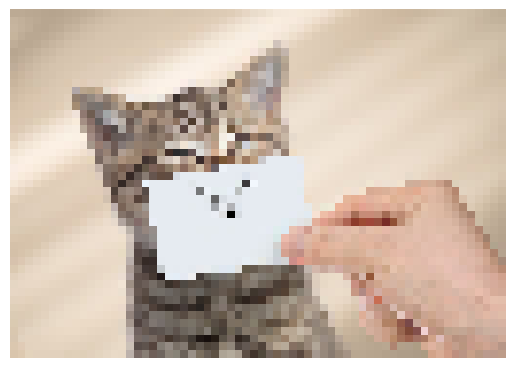

In [224]:
# Downsample
downsample_rate = 8
I_rotated = I[::downsample_rate, ::downsample_rate, :]

plt.imshow(I_rotated)
plt.axis("off");

## Example 3

In [225]:
I = io.imread("/content/sample_3.png")

In [226]:
print(I.shape[0])
print(I.shape[1])
print(I.shape[2])

2000
2000
4


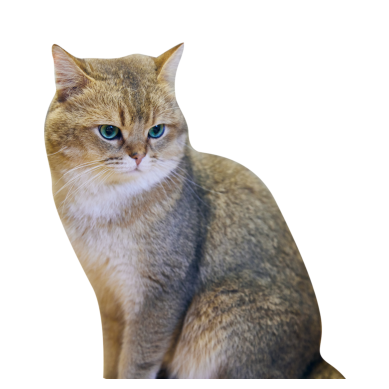

In [227]:
plt.imshow(I)
plt.axis('off');

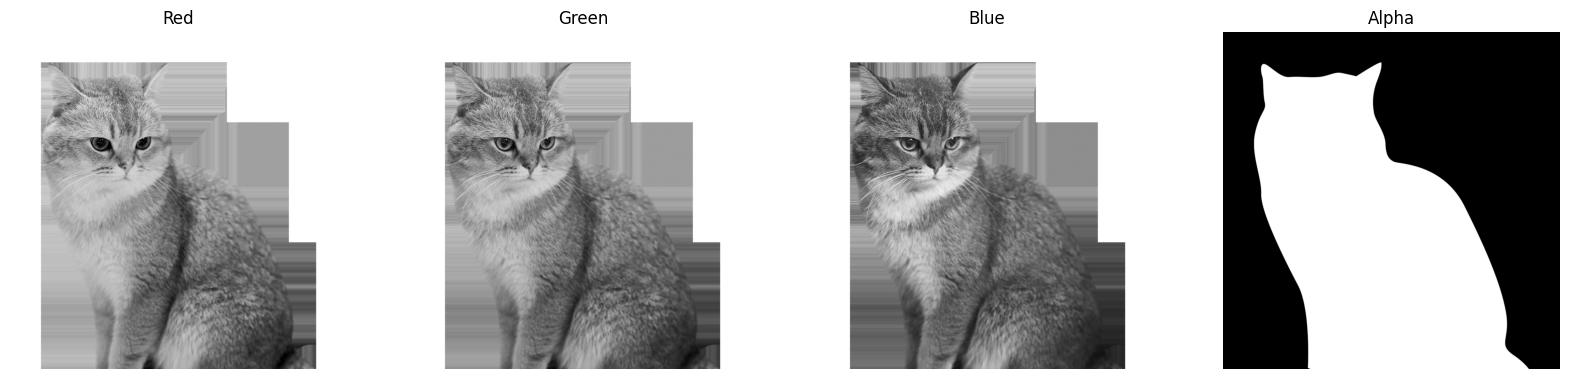

In [151]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Red channel
axes[0].imshow(I[:, :, 0], cmap="gray")
axes[0].axis("off")
axes[0].set_title("Red")

# Green channel
axes[1].imshow(I[:, :, 1], cmap="gray")
axes[1].axis("off")
axes[1].set_title("Green")

# Blue channel
axes[2].imshow(I[:, :, 2], cmap="gray")
axes[2].axis("off")
axes[2].set_title("Blue")

# Alpha channel
axes[3].imshow(I[:, :, 3], cmap="gray")
axes[3].axis("off")
axes[3].set_title("Alpha");

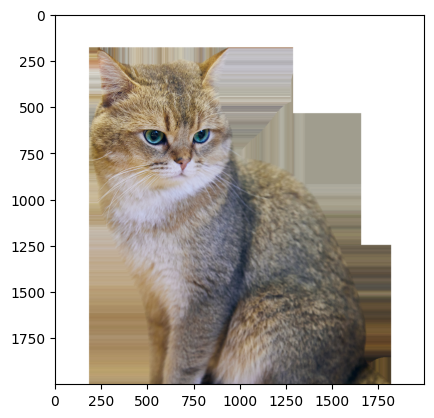

In [152]:
plt.imshow(I[:,:,:3])

#Counting pixels

One type of processing that we are going to do in the next lab is point processing. Point processing takes a bunch of pixels at a certain value and applies a certain mapping. No need to worry about how point processing is done right now. However point processing requires us to know about the value distribution of the pixels. To get the value distribution, we basically count the pixel values in an image.

Lets take an image and count the pixel values -

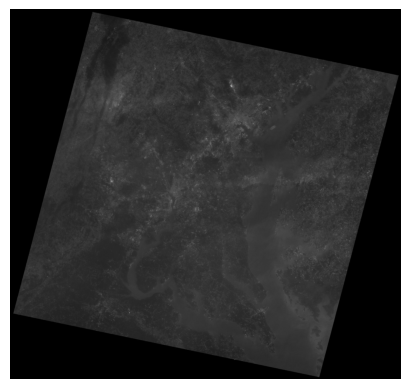

In [153]:
I = io.imread("/content/sample_4.jpeg")
plt.imshow(I, cmap='grey')
plt.axis('off');

In [154]:
print(I.shape[0], I.shape[1])

1901 2010


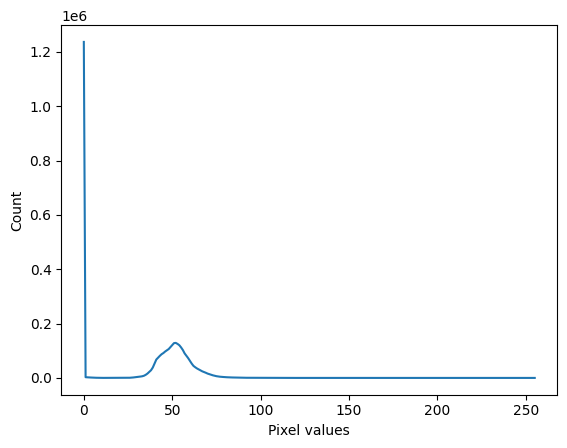

In [155]:
#all the pixel values
#[0,255] since unnormalized
pixel_values = np.arange(0, 256)
pixel_count = np.zeros_like(pixel_values)

for pixel in I.flatten():
  pixel_count[pixel] += 1

plt.plot(pixel_values, pixel_count);
plt.xlabel("Pixel values")
plt.ylabel("Count");

Instead of doing it manually, is there function that does the same thing? Yes there is. This graph is basically the histogram, and skimage has a histogram function that is way faster.

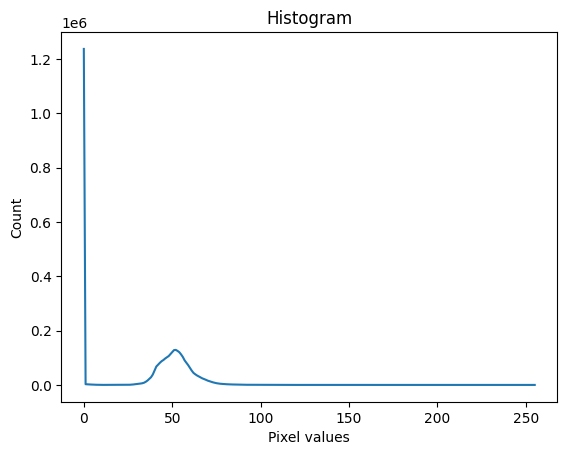

In [156]:
from skimage import exposure

hist, bins_hist = exposure.histogram(I, nbins=256)

plt.plot(bins_hist, hist);
plt.xlabel("Pixel values")
plt.title('Histogram')
plt.ylabel("Count");

What insights can we get from this histogram? Firstly we see that the graph has a high peak at 0. This is because the image is a bit skewed and there are black regions with no information at the edges which contributes to the pixel count of the 0 value. This is basically noise. So we can safely ignore this spike.

Now coming to actual image information, we see that the original image is pretty dark. This is because most of the pixels are located at a very small region around the pixel values 40-70. In the next lab, we will see how to fix this.

Now for the last part of the lab, the histogram count values are unbounded. But what if we just wanted a percentage ranging [0,1]? How can we do that? The `exposure.histogram()` function has a parameter called `normalize`. Lets make it true and see what happens.

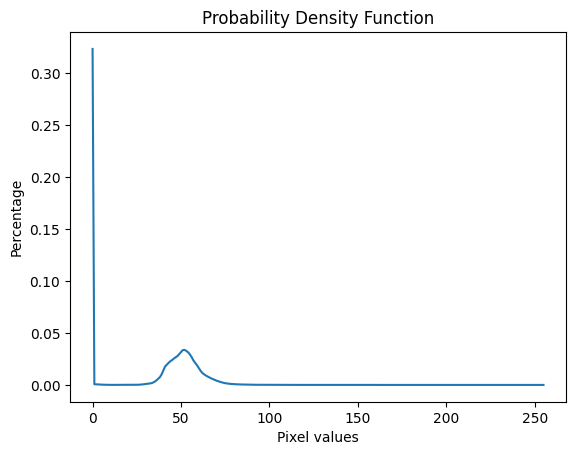

In [157]:
hist, bins_hist = exposure.histogram(I, nbins=256, normalize = True)

plt.plot(bins_hist, hist);
plt.xlabel("Pixel values")
plt.title('Probability Density Function')
plt.ylabel("Percentage");

This graph is no longer a histogram plot. Its a probability density function (PDF) graph. We will also need the PDF graph for the next lab as we will study a global processing tool called - histogram equalization.